# Part I - BikeTrip Data Exploration
## by ferjani

## Introduction
> We are analyzing the dataset that contains the information about more than 180,000 trips in bikes


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading the dataset and describing its properties 


In [2]:
gobikedb = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
gobikedb.shape

(183412, 16)

In [4]:
gobikedb.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [5]:
gobikedb.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [6]:
gobikedb.isnull().count() 

duration_sec               183412
start_time                 183412
end_time                   183412
start_station_id           183412
start_station_name         183412
start_station_latitude     183412
start_station_longitude    183412
end_station_id             183412
end_station_name           183412
end_station_latitude       183412
end_station_longitude      183412
bike_id                    183412
user_type                  183412
member_birth_year          183412
member_gender              183412
bike_share_for_all_trip    183412
dtype: int64

In [7]:
gobikedb.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### What is the structure of your dataset?

> In this dataset we have 183412 rows and  16 columns, so for each row we can see the information about the duration in seconds of the trip the id of the bike, type of user and his gender, start/end time  and many other information about the stations of start and end

### What is/are the main feature(s) of interest in your dataset?

> I am interesting in analyze:
-which are the most common stations of departure 
-the average duration of a trip

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> the features which i can focus most on in this case are start_station_id or start_station_name and duration_sec

## Univariate Exploration

> First of all we create a copy of the dataset, so we can manage the columns and add new attributes if necessary to work on the analysis


In [8]:
df_copy = gobikedb.copy()

In [9]:
#drop column not necessary for analyzis
df_copy.drop(['start_station_latitude', 'start_station_longitude','end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [10]:
#add new columns in the table like day of week for the trip and the duration of the trip in hour

In [11]:
df_copy['day_of_week'] = pd.DatetimeIndex(df_copy['start_time']).strftime('%A')

In [12]:
df_copy['duration_in_hours'] = df_copy['duration_sec']/3600

In [13]:
df_copy['duration_in_hours'].min()

0.016944444444444446

In [14]:
df_copy['duration_in_hours'].max()

23.734444444444446

In [15]:
df_copy.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,duration_in_hours
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,Thursday,14.495833
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,Thursday,11.811389
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,Thursday,17.181667


In [16]:
df_copy['category_of_duration'] = 'easy & fast'

In [17]:
#df_copy['category_of_duration'][(df_copy['duration_in_hours'] <= 1)] = 'easy & fast'
df_copy['category_of_duration'][(df_copy['duration_in_hours'] > 1) & (df_copy['duration_in_hours'] <= 4)] = 'pic-nic'
df_copy['category_of_duration'][(df_copy['duration_in_hours'] > 4) & (df_copy['duration_in_hours'] <= 8)] = 'along the river'
df_copy['category_of_duration'][(df_copy['duration_in_hours'] > 8) & (df_copy['duration_in_hours'] <= 16)] = 'detective'
df_copy['category_of_duration'][(df_copy['duration_in_hours'] > 16) & (df_copy['duration_in_hours'] <= 24)] = 'hero'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ip

In [18]:
df_copy.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,duration_in_hours,category_of_duration
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,Thursday,14.495833,detective
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,Thursday,11.811389,detective
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972.0,Male,No,Thursday,17.181667,hero


In [19]:
df_copy['duration_sec'].value_counts(bins=5)

(-24.384, 17137.6]    183163
(17137.6, 34214.2]       124
(34214.2, 51290.8]        48
(51290.8, 68367.4]        47
(68367.4, 85444.0]        30
Name: duration_sec, dtype: int64

In [20]:
df_copy['duration_sec'].value_counts()[3001]

2

In [21]:
df_copy['category_of_duration'].value_counts()

easy & fast        181702
pic-nic              1409
along the river       143
detective             102
hero                   56
Name: category_of_duration, dtype: int64

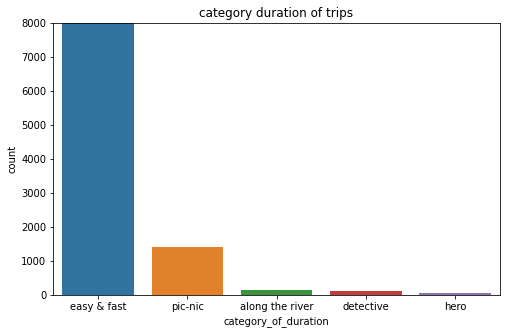

In [22]:
categories = ['easy & fast', 'pic-nic', 'along the river', 'detective', 'hero']
plt.figure(figsize=[8, 5])
plt.title('category duration of trips')
plt.xlabel('Days')
plt.ylim(0,8000)
ax = sb.countplot(x="category_of_duration", data=df_copy, order=categories)

# Categories of trips
With the figure above we are just familiarize with the data: we categorized the trips based on their duration so if the trips
are less than one hour they named 'easy & fast' between one hour and four hours 'pic-nic', from four to eight hours 'along the river'
from eight to sixteen hours 'detective' and from sixteen to 24 hours named 'hero'
So here we can notice that the majority of trips are 'easy & fast'


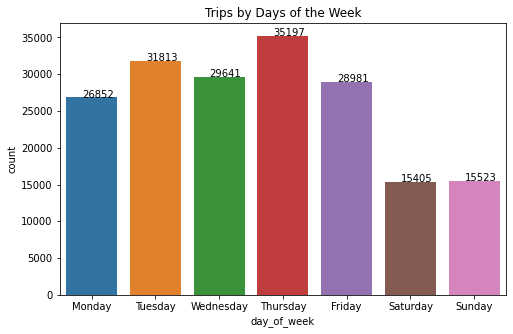

In [23]:
# plot distribution of day of week

weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[8, 5])
plt.title('Trips by Days of the Week')
plt.xlabel('Days')

ax = sb.countplot(x="day_of_week", data=df_copy, order=weekday)

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# Days of Week
Here we are categorizing all the trips by the days of the week to see if are there particulars pattern 
In this case we should notice that in weekdays are more trips than weekends and this is logic cause people are more relaxing at the end of week

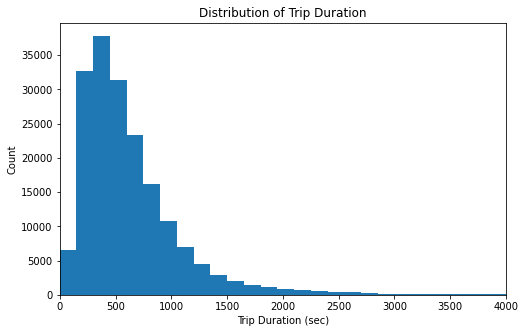

In [24]:
binsize = 150
bins = np.arange(0, df_copy['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'duration_sec', bins=bins)
plt.xlim(0, 4000)
plt.xlabel('Trip Duration (sec)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration')
plt.show()

Duration of trips
This is a graph that show us immediately the distribuitionof the trips (in seconds) so we can see that the majority are under 1000 seconds which is about 17 minutes and confirm the first figure about categories (that was in hours)

In [25]:
df_copy['duration_sec'].describe()

count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64

In [26]:
#How many trips are under 796 seconds (13.3 min) ? 
len(df_copy[df_copy['duration_sec']<=796])

137639

In [27]:
df_copy['time start'] = pd.to_datetime(df_copy["start_time"], format = '%Y-%m-%d %H:%M:%S.%f').dt.strftime('%Y-%m-%d %H:%M:%S')

In [28]:
df_copy['time start'].head(2)

0    2019-02-28 17:32:10
1    2019-02-28 18:53:21
Name: time start, dtype: object

In [29]:
df_copy['time start'] = pd.to_datetime(df_copy['time start'])

In [30]:
df_copy['time start hour'] = df_copy['time start'].dt.hour

In [31]:
df_copy['time start hour'].head(2)

0    17
1    18
Name: time start hour, dtype: int64

In [32]:
df_copy['part_of_day'] = 'Night'
df_copy['part_of_day'][(df_copy['time start hour'] >= 5) & (df_copy['time start hour'] < 12)] = 'Morning'
df_copy['part_of_day'][(df_copy['time start hour'] >= 12) & (df_copy['time start hour'] < 17)] = 'Afternoon'
df_copy['part_of_day'][(df_copy['time start hour'] >= 17) & (df_copy['time start hour'] < 21)] = 'Evening'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [33]:
df_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,duration_in_hours,category_of_duration,time start,time start hour,part_of_day
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,Thursday,14.495833,detective,2019-02-28 17:32:10,17,Evening
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,Thursday,11.811389,detective,2019-02-28 18:53:21,18,Evening


In [34]:
partsofday = ['Morning', 'Afternoon', 'Evening', 'Night']

<AxesSubplot:xlabel='part_of_day', ylabel='count'>

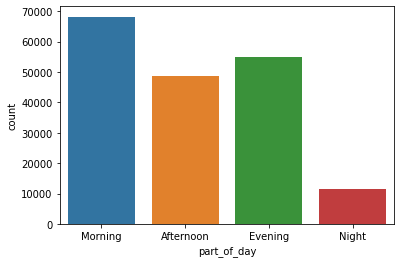

In [35]:
sb.countplot(data = df_copy, x = 'part_of_day', order=partsofday)

Here we have a graph that show us the starting trips based on the part of day , and we can notice that the majority start their trip in the morning which we had categorized between 5 a.m to 12 p.m

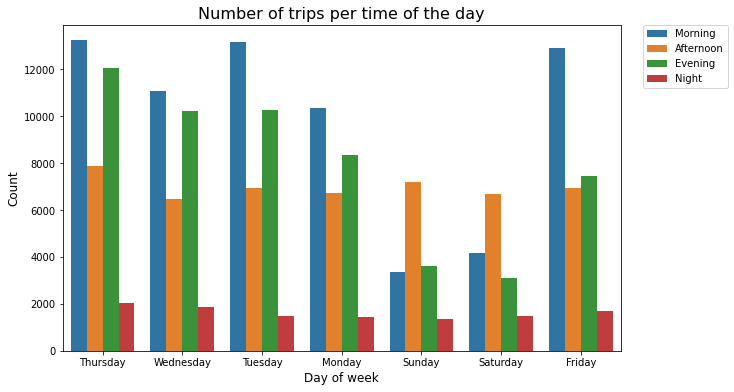

In [36]:
plt.figure(figsize=[10, 6])
sb.countplot(data = df_copy, x = 'day_of_week', hue = 'part_of_day', hue_order=partsofday)
plt.xlabel('Day of week', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Number of trips per time of the day', fontsize=16)
plt.legend(title = 'Time of the day');
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left", borderaxespad=0)

Here we can see for every day which is the part most used by riders, and we can notice that for weekdays the morning is the part more frequented, and in weekends we have afternoon with more rides than other times

In [37]:
# visualize the distribuition of start hour trips

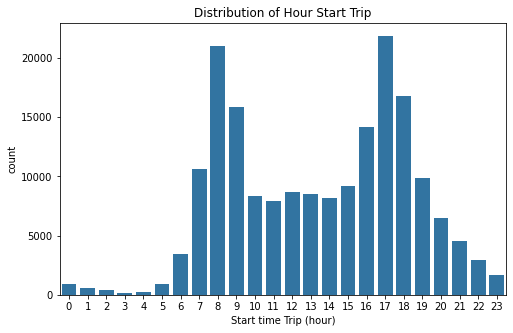

In [38]:
# plot distribution of hour start trip
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df_copy, x = 'time start hour', color = base_color)
plt.title('Distribution of Hour Start Trip')
plt.xlabel('Start time Trip (hour)')
plt.show()

# Distribuition of start Time
Here We can see that the most of trips starts at 8 a.m  or 17 p.m ; that is coherent with the fact that this times are used by people to go work or home 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> We can see that the distribuition of the trips in duration (in seconds) is very right skewed; more than 75% of the trips was completed in less than 800 seconds (13.33 minutes) 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> With a convertion of the variable duration in seconds in duration in hour and categorizing the trips by their duration in hour we can also see that most of them are : 'easy & fast' that means duration took less than an hour
We also analyzed the distribuition of start time trips extracting the start hour from the variable 'start_time' and we can see here that the most frequently trips start at 8 am and 17 pm that does make sense because in this hours people go work or return home 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [39]:
df_copy.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,day_of_week,duration_in_hours,category_of_duration,time start,time start hour,part_of_day
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984.0,Male,No,Thursday,14.495833,detective,2019-02-28 17:32:10,17,Evening
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,81.0,Berry St at 4th St,2535,Customer,NaN,NaN,No,Thursday,11.811389,detective,2019-02-28 18:53:21,18,Evening


In [40]:
#numeric_vars = ['time start hour', 'duration_in_hours', 'member_birth_year']
numeric_vars = ['duration_in_hours', 'time start hour', 'member_birth_year']
categoric_vars = ['user_type', 'member_gender', 'day_of_week']

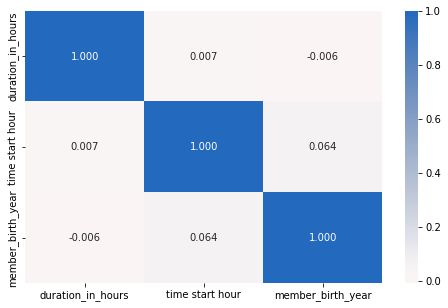

In [41]:
# correlation plot
plt.figure(figsize = [8, 5])
sb.heatmap(df_copy[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

Here we can see that 'time start hour', 'duration_in_hours' and 'member_birth_year' are not correlated each other

In [42]:
#require seaborn version 9.0 at least, if seaborn version under 9.0 open new terminal and run this line : pip install seaborn --upgrade

In [43]:
sb.__version__

'0.11.2'

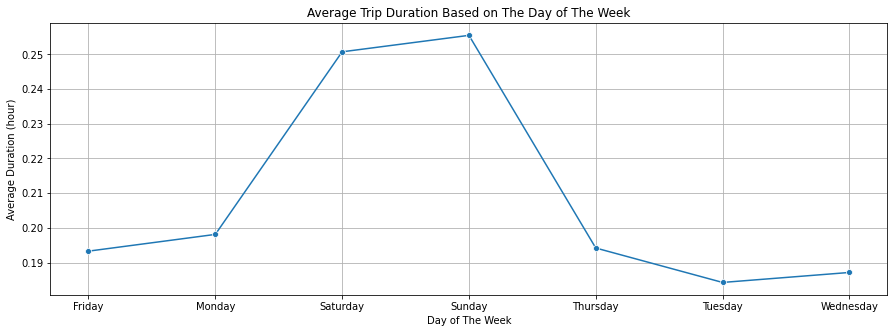

In [44]:
weekday_avg_hours = df_copy[['day_of_week','duration_in_hours']].groupby(['day_of_week'],as_index= False).mean()
# plot a line plot
plt.figure(figsize=[15,5])
sb.lineplot(data=weekday_avg_hours, x='day_of_week', y='duration_in_hours',marker='o')
plt.ylabel('Average Duration (hour)');
plt.xlabel('Day of The Week')
plt.grid()
plt.title('Average Trip Duration Based on The Day of The Week')
plt.show()

Here we have a graph that show us the average duration of trips by the days, so we can notice that in weekend people take longer trips and it may be given by the fact that in those days there is no rush

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

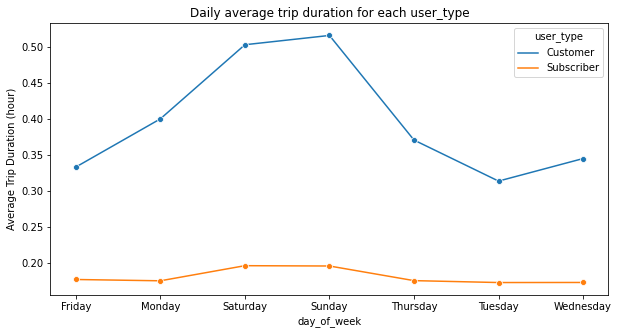

In [45]:
user_weekday_avg_hour = df_copy.groupby(['user_type','day_of_week']).duration_in_hours.mean()
user_weekday_avg_hour = user_weekday_avg_hour.reset_index()

# plot a line plot with colors based on user_type
plt.figure(figsize=[10,5])
sb.lineplot(data = user_weekday_avg_hour, x='day_of_week', y='duration_in_hours', hue='user_type', marker='o')
plt.title("Daily average trip duration for each user_type")
plt.ylabel('Average Trip Duration (hour)');

Here instead we are analyzing the average trip duration for user_type, and we can immediately notice that customer users 
tend to take it slower

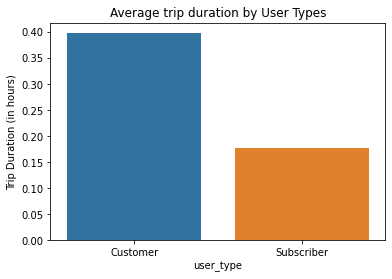

In [46]:
# Average trip duration in hours 
user_type_duration = df_copy[['user_type','duration_in_hours']].groupby(['user_type'],as_index= False).mean()

sb.barplot(x='user_type', y='duration_in_hours', data=user_type_duration)
plt.title("Average trip duration by User Types")
plt.ylabel("Trip Duration (in hours)")
plt.show()

Here We do a confront of the trips duration by user_type , We can see that Customer trips in average are longer that subscriber trips as we saw in the graph above also

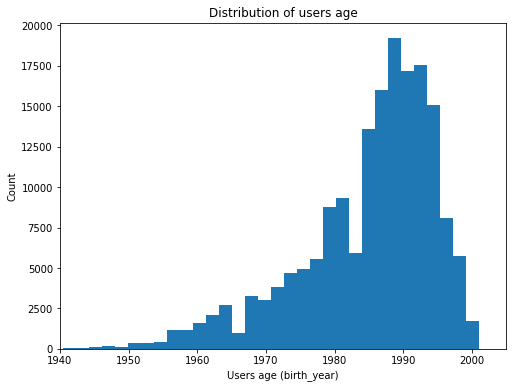

In [47]:
bins=65
plt.figure(figsize=[8, 6])
plt.hist(data = df_copy, x = 'member_birth_year', bins=bins)
plt.xlim([1940, 2005])
plt.xlabel('Users age (birth_year)')
plt.ylabel('Count')
plt.title('Distribution of users age')
plt.show()

In the graph above we took a look of the distribution of riders ages, by the value of their year of birth and we can see that most of them were born between the late 80's and early 90's

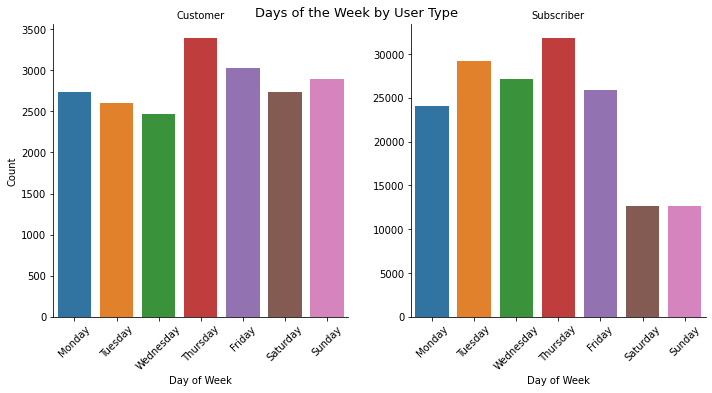

In [48]:
dywt = sb.catplot(data=df_copy, x='day_of_week', col="user_type", kind='count', sharey = False,
             order = weekday)
dywt.set_axis_labels("Day of Week", "Count")
dywt.set_titles("{col_name}")
dywt.fig.suptitle('Days of the Week by User Type', fontsize=13)
dywt.set_xticklabels(rotation = 45)

Here we are confronting the trips by customer or subscriber in terms of days of week , we can see that the graphs are similar but in subscriber graph's we see that trips in weekends are less than other days , subscribers use bikes less in weekends

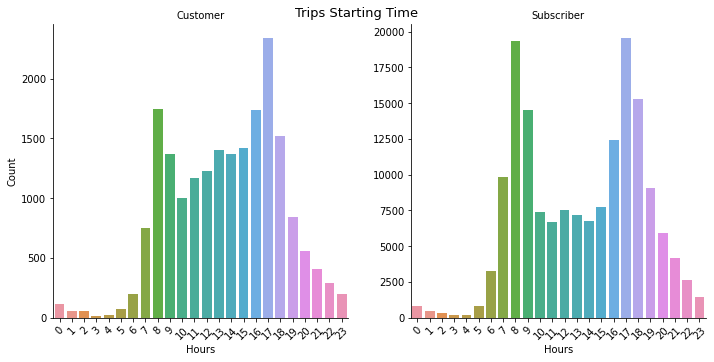

In [49]:
dstarttimebyuser = sb.catplot(data=df_copy, x='time start hour', col="user_type", kind='count', sharey = False,)
dstarttimebyuser.set_axis_labels("Hours", "Count")
dstarttimebyuser.set_titles("{col_name}")
dstarttimebyuser.fig.suptitle('Trips Starting Time', fontsize=13)
dstarttimebyuser.set_xticklabels(rotation = 45)

Here we Have a confront by user type based on start time of the trips, the most popular times remain 8 a.m and 17  p.m for both kind of users

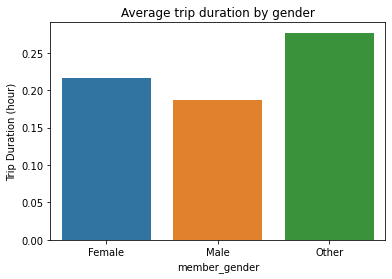

In [50]:
gender_type_duration = df_copy[['member_gender','duration_in_hours']].groupby(['member_gender'],as_index= False).mean()

sb.barplot(x='member_gender', y='duration_in_hours', data=gender_type_duration)
plt.title("Average trip duration by gender")
plt.ylabel("Trip Duration (hour)")
plt.show()

In this graph we always analyze average trips duration, and this time we are confronting male users with female users, and in average we can confirm that female take longer trips

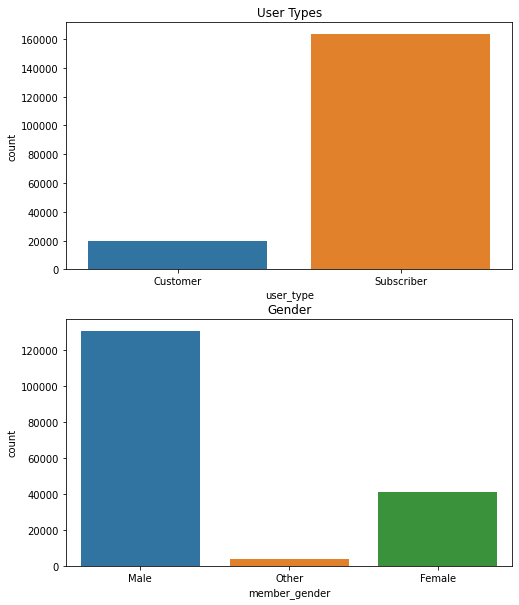

In [51]:
fig, ax = plt.subplots(nrows=2, figsize = [8,10])
default_color = sb.color_palette()[1]
sb.countplot(data = df_copy, x = 'user_type', ax = ax[0])
sb.countplot(data = df_copy, x = 'member_gender', ax = ax[1])
ax[0].set_title('User Types');
ax[1].set_title('Gender');

And here we have in the same graph the confront of both charateristics of riders, customers and subscribers a or males and females

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> here we showed that there is a dependency of the average trip duration on if a user is a subscriber or a customer. On average, Customers have longer trips , this have sense if we think about customer took bikes not frequently and he can take it easy when he has to go for a ride while subsricribers often have their specific route to make. finally we can see that both the categories have more rides in the week-end 

### Were there any interesting or surprising interactions between features?

> We can see that for female people the average trip duration is more higher than for male people, interesting 